In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum().sum()

0

<Axes: xlabel='Class', ylabel='Count'>

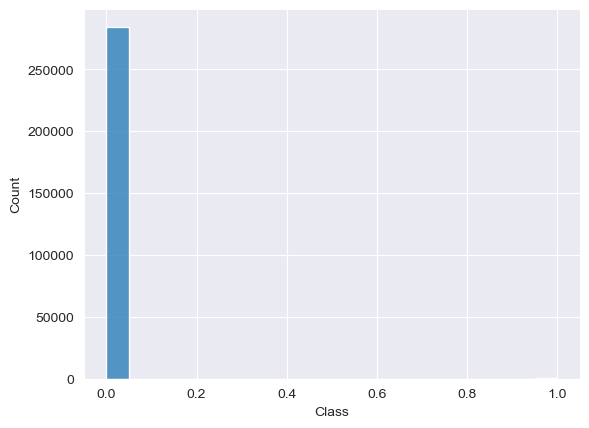

In [7]:
sns.histplot((df['Class']))

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

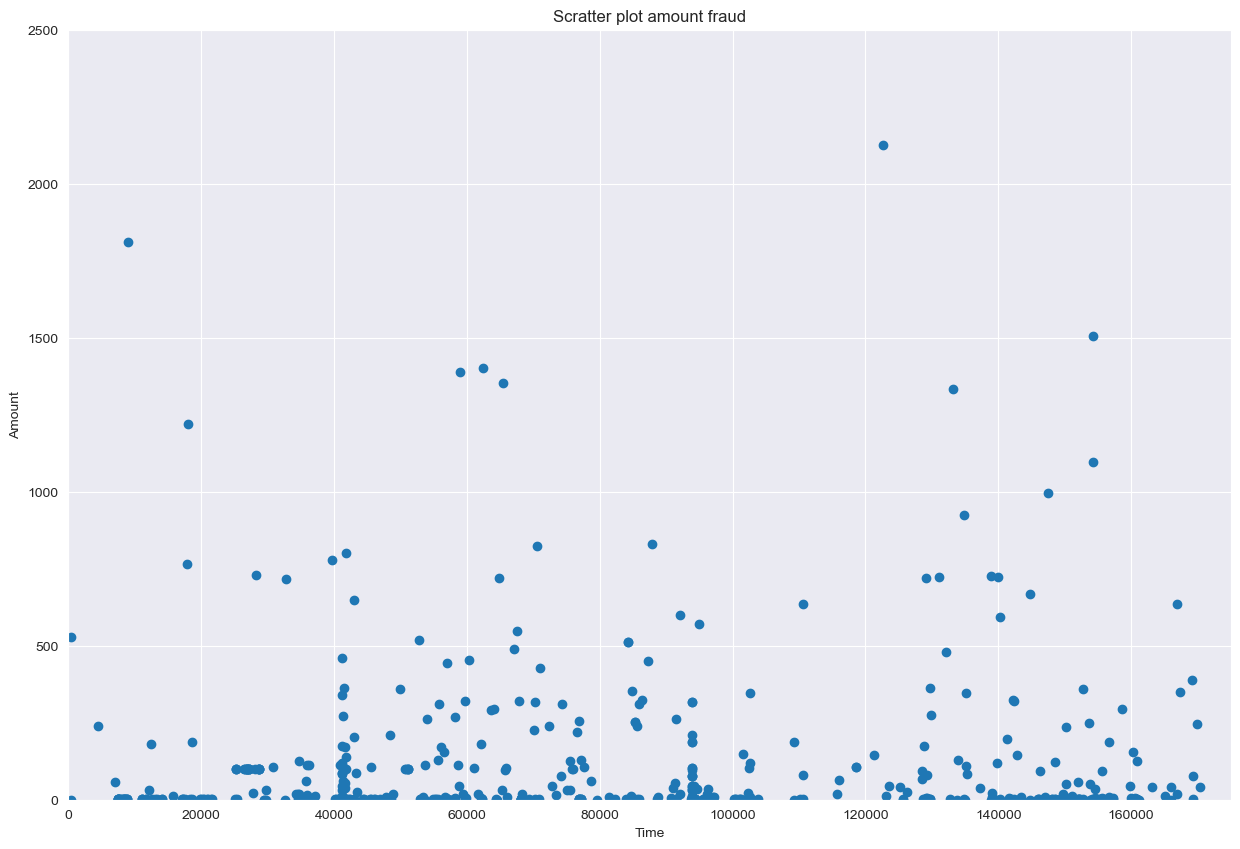

In [9]:


df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()



In [10]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'],test_size=.25, random_state=21)

In [11]:
#sns.pairplot(data=df['Amount'], hue="Class",palette="bright")

Text(0.5, 1.0, 'Correlation between features')

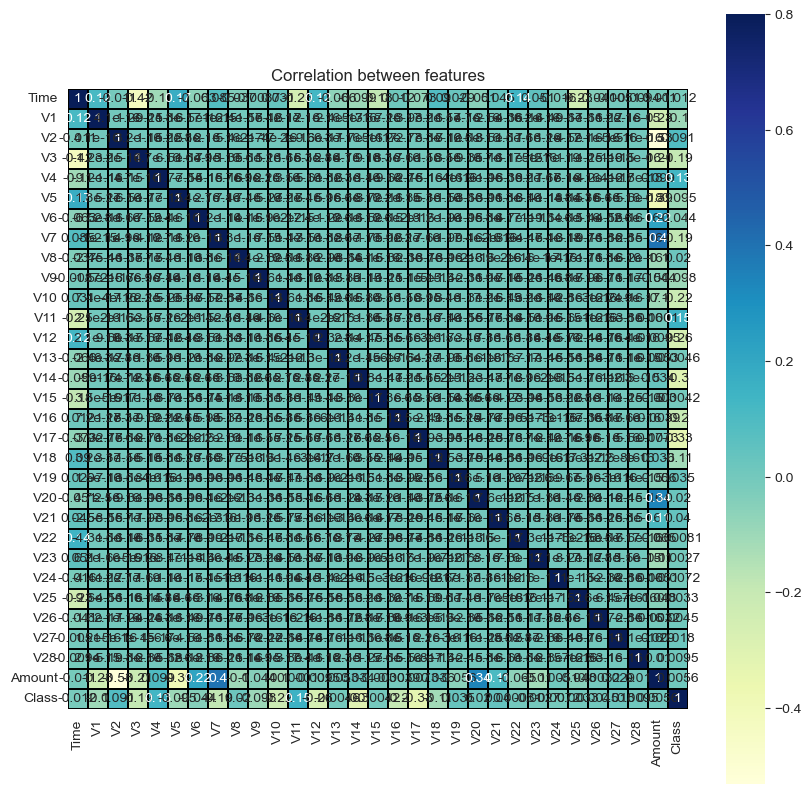

In [12]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [13]:
from sklearn.svm import SVC

In [14]:
model = SVC()

In [15]:
model.fit(x_train,y_train)

SVC()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
output = model.predict(x_test)

In [18]:
print(classification_report(y_test,output))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71070
           1       0.00      0.00      0.00       132

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202



C:\Users\saim.selim\AppData\Local\anaconda3\envs\pythonProject\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saim.selim\AppData\Local\anaconda3\envs\pythonProject\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saim.selim\AppData\Local\anaconda3\envs\pythonProject\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [19]:
print(confusion_matrix(y_test,output))

[[71070     0]
 [  132     0]]


In [20]:
grid_param = {'C': [0.1,1, 10, 100, 1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel': ['linear'] }

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
grid = GridSearchCV(estimator=SVC(), param_grid=grid_param, verbose=3)

In [ ]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.999 total time= 4.9min
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.999 total time= 4.7min
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.999 total time=47.1min
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.999 total time= 4.5min
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.999 total time= 6.9min
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.999 total time= 4.7min
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.999 total time= 3.9min
